In [2]:
import IM_rank_correlations as IMR;
import measure_classification as mc;
import compute_invariance as compute_invariance;
from Measures import map_measures_to_indices;
import numpy as np;
import csv;
from sklearn.cluster import AgglomerativeClustering

In [3]:
tables = [];
with open('rules_mushroom.csv') as csvfile:
    rule_reader = csv.reader(csvfile)
    for rule in rule_reader:
        tables.append([int(rule[0]), int(rule[2]), int(rule[3]), int(rule[1])])
        
tables = np.array(tables)

In [4]:
n_clusters = 20;
ac = AgglomerativeClustering(n_clusters=n_clusters)
clusters = ac.fit_predict(tables[:,1:4])
for i in range(n_clusters):
    if (np.mean(tables[clusters==i][:,0]) > 10) and (len(tables[clusters==i]) > 200):
        print(i, len(tables[clusters==i]), np.mean(tables[clusters==i][:,0]), np.var(tables[clusters==i][:,0]) )
#     sns.distplot(tables[clusters==i][:,0], label=str(i))
# plt.show()

0 739 144.847090663 42050.0375118
1 739 144.847090663 42050.0375118
2 476 677.205882353 575390.045848
3 476 677.205882353 575390.045848
4 296 2387.9527027 2427021.30182
5 2517 10.6912991657 1317.7803494
6 1243 73.8053097345 22214.2275824
7 300 927.06 436944.303067
8 1056 61.4640151515 16600.3225687
9 314 725.630573248 356042.264798
10 625 402.9824 170920.43329
11 419 747.789976134 372315.378324
12 625 148.7552 65763.704873
13 708 47.1906779661 10170.7051673
14 708 47.1906779661 10170.7051673
18 294 774.680272109 294424.435189
19 438 114.872146119 24765.8603657


In [5]:
idx = 0;
np.mean(tables[clusters==idx][:,0]), tables[clusters==idx]

(144.8470906630582, array([[   4, 3912,    0, 4208],
        [   4, 3964,    0, 4156],
        [   0, 4040,    4, 4080],
        ..., 
        [ 192, 4984, 1440, 1508],
        [1008, 4604,  864, 1648],
        [1008, 4604,  864, 1648]]))

In [6]:
tabs = tables[clusters==idx]

In [7]:
# tabs

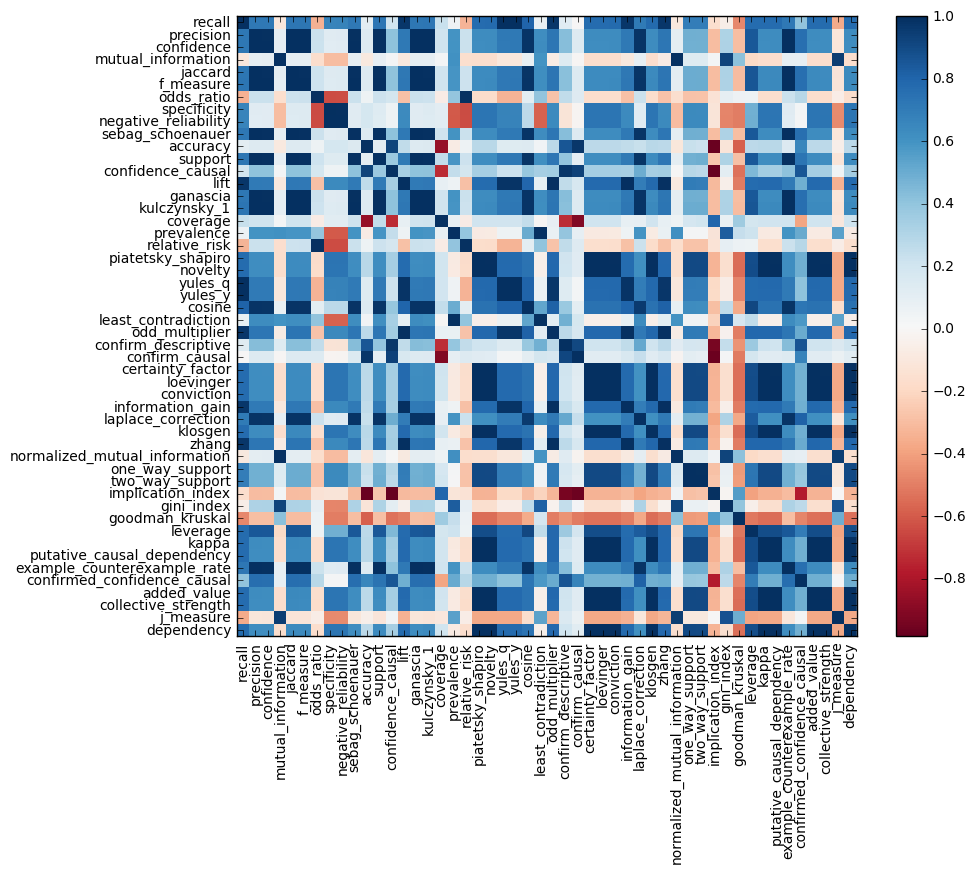

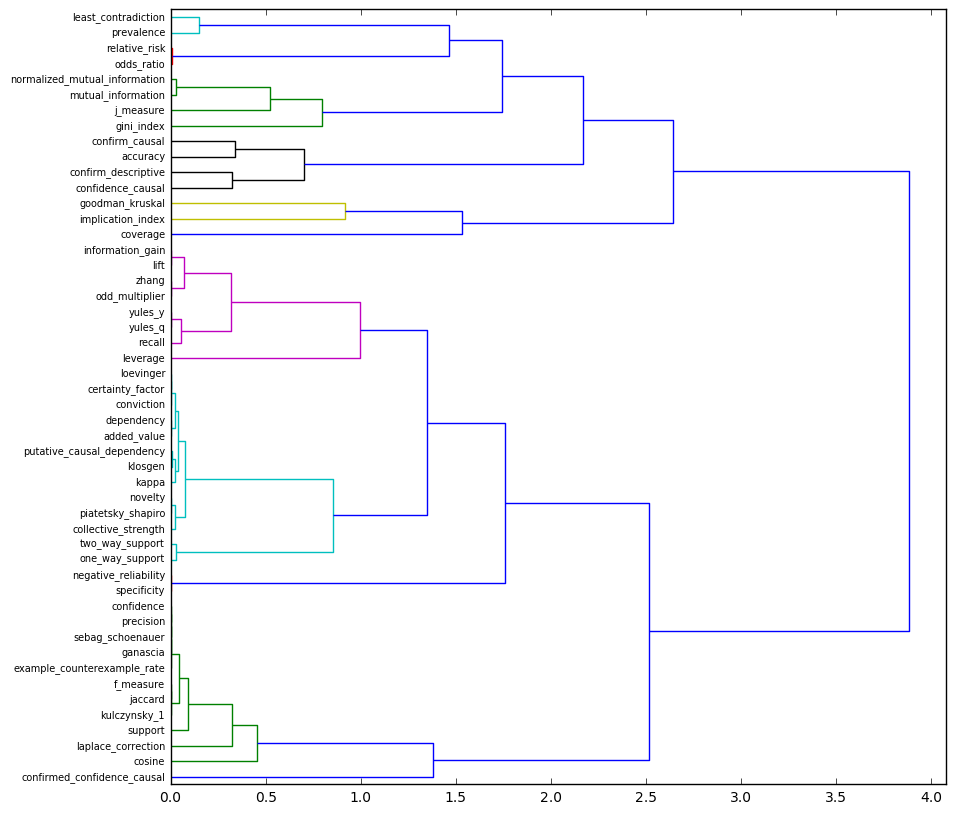

In [8]:
(measures_dict, measures_arr) = map_measures_to_indices();
(ranks_matrix, scores_matrix) = IMR.create_ranks_matrix(tabs, measures_arr);
ranks_matrix.visualize()

In [9]:
# def find_redundant(measures_arr, ranks_matrix):
# #     print(len(measures_arr))
#     for i in range(len(measures_arr)):
#         for j in range(len(measures_arr)):
#             if (i > j):
# #                 print(ranks_matrix)
#                 if (np.around(ranks_matrix.corr_spearman[i][j], 4) == 1):
#                     print(measures_arr[i],measures_arr[j], ranks_matrix.corr_spearman[i][j]);
#                     return(j);

# # remove redundant measures
# while find_redundant(measures_arr, ranks_matrix):
#     i = find_redundant(measures_arr, ranks_matrix);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(i);
    
# print(len(measures_arr))
# ranks_matrix.show_dendrogram()


In [10]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters);
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

In [11]:
def cluster_set_2():
    rm = IMR.ranks(scores_matrix, measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
#     while find_redundant(ma, rm):
#         i = find_redundant(ma, rm);
#         md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(4, rm);
    return (clusters, md, ma);

(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();

In [12]:
print_cluster_set(clusters_2, measures_arr_2)

23 [ 0  7  8 13 19 20 21 22 25 28 29 30 31 33 34 36 37 41 42 43 46 47 49]
['recall' 'specificity' 'negative_reliability' 'lift' 'piatetsky_shapiro'
 'novelty' 'yules_q' 'yules_y' 'odd_multiplier' 'certainty_factor'
 'loevinger' 'conviction' 'information_gain' 'klosgen' 'zhang'
 'one_way_support' 'two_way_support' 'leverage' 'kappa'
 'putative_causal_dependency' 'added_value' 'collective_strength'
 'dependency']
12 [ 1  2  4  5  9 11 14 15 23 32 44 45]
['precision' 'confidence' 'jaccard' 'f_measure' 'sebag_schoenauer'
 'support' 'ganascia' 'kulczynsky_1' 'cosine' 'laplace_correction'
 'example_counterexample_rate' 'confirmed_confidence_causal']
12 [ 3  6 10 12 17 18 24 26 27 35 39 48]
['mutual_information' 'odds_ratio' 'accuracy' 'confidence_causal'
 'prevalence' 'relative_risk' 'least_contradiction' 'confirm_descriptive'
 'confirm_causal' 'normalized_mutual_information' 'gini_index' 'j_measure']
3 [16 38 40]
['coverage' 'implication_index' 'goodman_kruskal']


In [13]:
def return_homogeneity(cluster_set, measures_dict):

    #old properties
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

#     # new properties
    (properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);
# mapping the properties array to the combination of the properties
#     (properties_array, property_names) = compute_invariance.map_UN_properties_to_combinations(properties_array);
    (support_array, entropy_array) = compute_invariance.compute_supports_updated(properties_array);
    
    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set_updated(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(cluster_vector);
#     print(properties_array)
    for idx, property_vector in enumerate(cluster_property_array):
        # property_vector is (n_prop_states, n_clusters)
        homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)
        # Property names
        print(property_names[idx]);

        # Entropy of split
#         print(entropy_array[idx]);
        
    
    #-----old properties------
        # Original split of properties
#         print([int(np.sum(property_vector[1,:])), int(np.sum(property_vector[0,:]))])

#         print(support_array[idx,1]);     #prints support for each prop_state

        
        # property counts of '-1' in new and '0' in old
#         print(property_vector[0,:]);
        
        # property counts of '0' in new and '1' in old
#         print(property_vector[1,:]);
#         print(homo)        
    
    #------new properties------
        # Original split of properties
        print([int(np.sum(property_vector[0,:])),
               int(np.sum(property_vector[1,:])),
               int(np.sum(property_vector[2,:]))]);
#               int(np.sum(property_vector[3,:])),
#               int(np.sum(property_vector[4,:])),
#               int(np.sum(property_vector[5,:]))]);

#         print(support_array[idx,0]);     #prints support for each prop_state

        # property counts of '-1' in new 
        print(property_vector[0,:]);
        
        # property counts of '0' in new
        print(property_vector[1,:]);
        
        # property counts of '1' in new
        print(property_vector[2,:]);

#         print(homo)

return_homogeneity(clusters_2, measures_dict_2);

[23 12 12  3]
UNAI_f11
[5, 0, 45]
[ 1.  2.  1.  1.]
[ 0.  0.  0.  0.]
[ 22.  10.  11.   2.]
UNAI_f00
[6, 0, 44]
[ 3.  0.  2.  1.]
[ 0.  0.  0.  0.]
[ 20.  12.  10.   2.]
UNAI_f10
[4, 0, 46]
[ 1.  1.  1.  1.]
[ 0.  0.  0.  0.]
[ 22.  11.  11.   2.]
UNAI_f01
[5, 0, 45]
[ 4.  0.  0.  1.]
[ 0.  0.  0.  0.]
[ 19.  12.  12.   2.]
UNAI
[13, 0, 37]
[ 6.  3.  3.  1.]
[ 0.  0.  0.  0.]
[ 17.   9.   9.   2.]
UNZR_f11
[10, 15, 25]
[ 4.  0.  4.  2.]
[ 10.   1.   3.   1.]
[  9.  11.   5.   0.]
UNZR_f00
[23, 18, 9]
[  2.  11.   7.   3.]
[ 15.   0.   3.   0.]
[ 6.  1.  2.  0.]
UNZR_f10
[11, 17, 22]
[ 7.  0.  1.  3.]
[ 8.  5.  4.  0.]
[ 8.  7.  7.  0.]
UNZR_f01
[18, 17, 15]
[ 2.  7.  7.  2.]
[ 8.  4.  4.  1.]
[ 13.   1.   1.   0.]
UNZR
[33, 14, 3]
[  9.  12.   9.   3.]
[ 11.   0.   3.   0.]
[ 3.  0.  0.  0.]


In [99]:
(properties_array1, property_names1, support_array1, entropy_array1) = compute_invariance.compute_property_vectors(measures_dict);

In [100]:
(properties_array2, property_names2) = compute_invariance.compute_new_property_vectors(measures_dict);

In [118]:
properties_array1[:,0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.])

In [146]:

idx_2 = 9;

for idx_1 in range(8):
    count_1 = 0;
    count_2 = 0;
    count_3 = 0;
    count_4 = 0;
    count_5 = 0;
    count_6 = 0;

    for i in range(50):
        if (properties_array1[i,idx_1] == 1):
            if (properties_array2[i,idx_2] == 1):
                count_1 += 1;
            elif (properties_array2[i,idx_2] == 0):
                count_2 += 1;
            elif (properties_array2[i,idx_2] == -1):
                count_3 += 1;
        elif (properties_array1[i,idx_1] == 0):
            if (properties_array2[i,idx_2] == 1):
                count_4 += 1;
            elif (properties_array2[i,idx_2] == 0):
                count_5 += 1;                
            elif (properties_array2[i,idx_2] == -1):
                count_6 += 1;

    print(property_names1[idx_1], property_names2[idx_2])
    print(count_1, count_2, count_3)
    print(count_4, count_5, count_6)

P1 UNZR
2 8 9
1 6 24
P2 UNZR
3 14 30
0 0 3
P3 UNZR
3 14 21
0 0 12
O1 UNZR
3 7 7
0 7 26
O2 UNZR
0 3 0
3 11 33
O3 UNZR
2 2 0
1 12 33
O4 UNZR
3 5 3
0 9 30
O5 UNZR
0 0 12
3 14 21
